<a href="https://colab.research.google.com/github/madhulraokadam/ml-projects-green-scale-datasets/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Forest for agricultural sustainability dataset**

## **1 Definition**

A **Random Forest** is a **supervised machine learning algorithm** used for both **classification and regression** tasks.

It is an **ensemble learning method** that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting.

Instead of relying on a single tree, Random Forest aggregates results from many trees using voting or averaging.

---

## **2 Key Idea**

The main idea behind Random Forest is that a group of weak learners together form a strong learner.

Each tree is trained on a random subset of data and features, making the model more robust and less prone to overfitting.

---

## **3 How Random Forest Works**

1. Select random samples from the dataset using bootstrap sampling.
2. Build a decision tree for each sample.
3. At each split, choose the best feature from a random subset of features.
4. Repeat until many trees are created.
5. Combine predictions from all trees.

For classification, majority voting is used.
For regression, average prediction is used.

---

## **4 Components of Random Forest**

### **Decision Trees**

Multiple trees built independently.

### **Bootstrap Sampling**

Random sampling with replacement to create training subsets.

### **Feature Randomness**

Random subset of features selected at each split.

### **Aggregation**

Combining predictions through voting or averaging.

---

## **5 Types of Random Forest**

### **Random Forest for Classification**

Predicts categorical outcomes.

Example: Disease prediction (Yes/No)

### **Random Forest for Regression**

Predicts continuous values.

Example: House price prediction

---

## **6 Important Concepts**

### **Bagging (Bootstrap Aggregating)**

A technique where multiple models are trained on different subsets of data and their predictions are combined.

### **Feature Importance**

Random Forest calculates importance scores for features based on their contribution to reducing impurity.

### **Out-of-Bag Error (OOB Error)**

Error estimate calculated using samples not included in bootstrap training.

---

## **7 Advantages**

* Reduces overfitting compared to decision trees
* High accuracy
* Handles large datasets efficiently
* Works well with missing values
* Can handle both classification and regression
* Provides feature importance
* Robust to noise

---

## **8 Disadvantages**

* Less interpretable compared to decision trees
* Requires more computational power
* Training can be slow with many trees
* Large memory usage
* Harder to visualize

---

## **9 Hyperparameters**

### **Number of Trees (n_estimators)**

Number of decision trees in the forest.

### **Max Depth**

Maximum depth of each tree.

### **Max Features**

Number of features considered for splitting.

### **Min Samples Split**

Minimum samples required to split a node.

### **Min Samples Leaf**

Minimum samples required at a leaf node.

---

## **10 Random Forest vs Decision Tree**

**Random Forest**

* Higher accuracy
* Less overfitting
* Less interpretable
* Slower training

**Decision Tree**

* Lower accuracy
* High overfitting risk
* Easy to interpret
* Faster training

---

## **11 Applications**

* Healthcare for disease prediction
* Finance for fraud detection
* Banking for credit scoring
* Marketing for customer segmentation
* E-commerce recommendation systems
* Stock market prediction
* Image classification

---

## **12 Evaluation Metrics**

### **For Classification**

* Accuracy
* Precision
* Recall
* F1 Score
* ROC AUC

### **For Regression**

* Mean Squared Error
* Root Mean Squared Error
* R squared

---

## **13 Real Life Example**

A bank wants to approve a loan.

Multiple decision trees analyze factors such as income, credit score, employment status, and loan history.

Each tree gives a prediction, and the final decision is based on majority voting.

---

## **14 Why Random Forest is Better than Decision Tree**

Random Forest improves prediction accuracy by reducing variance through averaging multiple trees.

It prevents overfitting by introducing randomness in data and feature selection.

---

## **15 Limitations**

Random Forest may not perform well when the dataset is very small.
It is computationally expensive for real-time predictions.
Model interpretability is lower compared to simpler models.

---

## **16 Conclusion**

Random Forest is a powerful ensemble learning algorithm that improves accuracy and stability by combining multiple decision trees. It is widely used in real-world applications due to its robustness and ability to handle complex datasets. Although it requires more computational resources and is less interpretable, it generally provides better performance than individual decision trees.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=pd.read_csv('/content/agricultural sustainability.csv')
rf.head()

,soil_health,crop_yield,water_usage,carbon_footprint,fertilizer_use,sustainability
0,0.374540,6778.284815,964.057410,126.020778,226.809659,0
1,0.950714,1757.259685,4561.488080,175.365653,88.134761,0
2,0.731994,2454.658427,2773.635676,129.654718,194.072090,0
3,0.598658,9086.987697,4219.058597,89.916140,201.678762,0
4,0.156019,6457.861537,1940.223205,104.286142,156.032668,0


In [ ]:
rf.shape

(200, 6)

In [ ]:
rf.describe()

,soil_health,crop_yield,water_usage,carbon_footprint,fertilizer_use,sustainability
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.484006,5539.376222,2843.027527,265.447017,165.864366,0.100000
std,0.294891,2637.010727,1382.889573,125.475562,71.333200,0.300753
min,0.005522,1045.554255,548.769432,58.149583,51.158006,0.000000
25%,0.228582,3353.162503,1649.841425,156.187970,102.350190,0.000000
50%,0.494486,5874.758903,2864.297645,260.207594,160.846065,0.000000
75%,0.756860,7679.793831,4150.017005,375.982833,222.493979,0.000000
max,0.986887,9914.546278,4998.729530,495.482105,299.218563,1.000000


In [ ]:
rf.info

<bound method DataFrame.info of      soil_health   crop_yield  water_usage  carbon_footprint  fertilizer_use  \
0       0.374540  6778.284815   964.057410        126.020778      226.809659   
1       0.950714  1757.259685  4561.488080        175.365653       88.134761   
2       0.731994  2454.658427  2773.635676        129.654718      194.072090   
3       0.598658  9086.987697  4219.058597         89.916140      201.678762   
4       0.156019  6457.861537  1940.223205        104.286142      156.032668   
..           ...          ...          ...               ...             ...   
195     0.349210  9376.815930  2632.827381        442.455759       72.895518   
196     0.725956  8725.714767  3504.009823        469.453227      279.328394   
197     0.897110  4860.946246  1275.439420        304.309933       84.204658   
198     0.887086  7757.839610  1365.300585        363.492871      287.559338   
199     0.779876  7790.885867   683.908773        465.124722      161.501443   

     sustainability  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
..              ...  
195               0  
196               0  
197               0  
198               0  
199               0  

[200 rows x 6 columns]>

In [ ]:
rf.columns

Index(['soil_health', 'crop_yield', 'water_usage', 'carbon_footprint',
       'fertilizer_use', 'sustainability'],
      dtype='object')

In [ ]:
x= rf[['soil_health', 'crop_yield', 'water_usage', 'carbon_footprint',
       'fertilizer_use']]
y=rf['sustainability'] #splitting of data

In [ ]:
xtr,xte,ytr,yte = train_test_split(
    x,y,test_size=0.2,random_state=42
)

In [ ]:
rf=RandomForestClassifier(n_estimators=100,
                          random_state = 42)

In [ ]:
rf.fit(xtr,ytr)

RandomForestClassifier(random_state=42)

In [ ]:
rf_pred=rf.predict(xte)
rf_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
rf_acc = accuracy_score(yte,rf_pred)
rf_acc

0.925

In [ ]:
rf_cm = confusion_matrix(yte,rf_pred)
rf_cm

array([[35,  0],
       [ 3,  2]])

In [ ]:
classifier_report = classification_report(yte,rf_pred)
print(classifier_report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        35
           1       1.00      0.40      0.57         5

    accuracy                           0.93        40
   macro avg       0.96      0.70      0.77        40
weighted avg       0.93      0.93      0.91        40



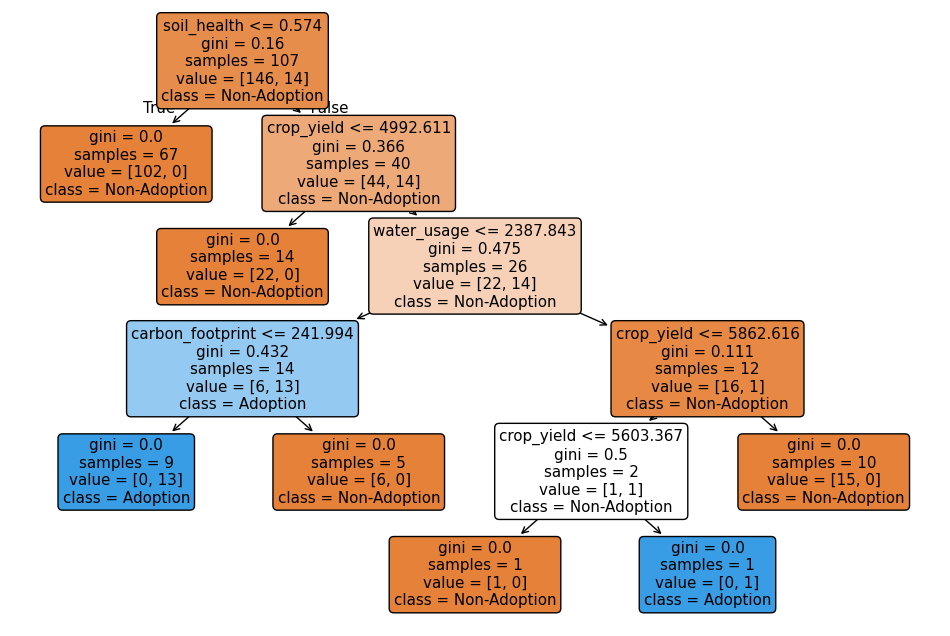

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Select one tree from the forest (example: first tree)
single_tree = rf.estimators_[0]

plt.figure(figsize=(12,8))
plot_tree(single_tree,
          feature_names=x.columns,
          class_names=['Non-Adoption', 'Adoption'],
          filled=True,
          rounded=True)

plt.show()